In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
iris=load_iris()

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
iris_petal=iris.data[:,[2,3]]

In [13]:
iris_df.shape

(150, 4)

In [15]:
iris_df["label"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
label,0.782561,-0.426658,0.949035,0.956547,1.000000


<Figure size 1000x1000 with 0 Axes>

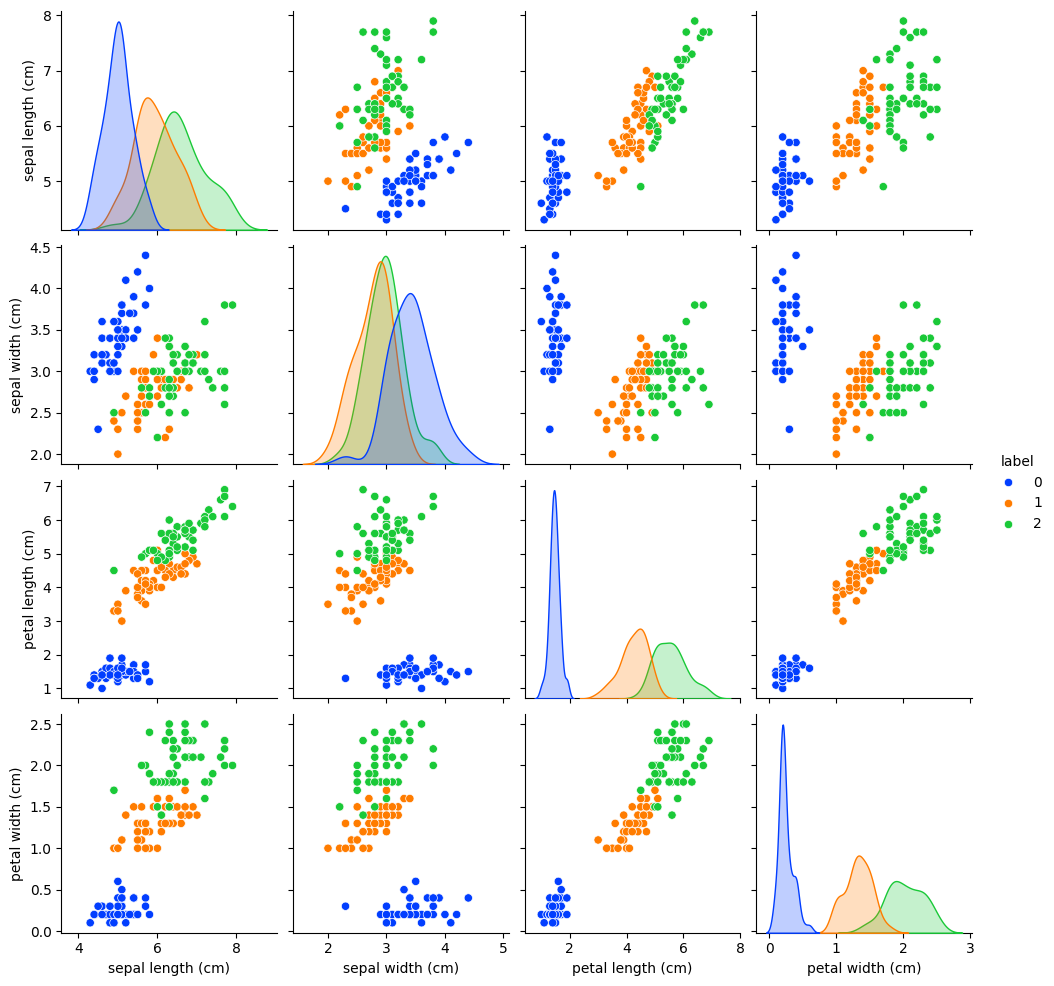

In [17]:
plt.figure(figsize=(10,10))
sns.pairplot(iris_df, hue='label', palette='bright')
plt.show()

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, # input data(feature)
                                                    iris.target, # ouput data(label or target)
                                                    test_size=0.2,
                                                    random_state=7)
print('train 개수: ', len(X_train), ', test 개수: ', len(X_test))

train 개수:  120 , test 개수:  30


In [31]:
dt_model = DecisionTreeClassifier(random_state=32)
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=32)

In [37]:
y_pred = dt_model.predict(X_test)
print(y_pred)
print(Y_test)

accuracy = accuracy_score(Y_test,y_pred)

print("정확도: ", accuracy)
print(classification_report(Y_test, y_pred))

[2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 2 2 1 1 2 2]
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]
정확도:  0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

